In [1]:
#Stock Market Prediction And Forecasting Using Stacked LSTM
#From keras tensorflow >2.0

import pandas_datareader as pdr

In [2]:
df = pdr.get_data_tiingo('AAPL', api_key= "7f435fd4ba61acf0dc490b9e6e994f3eae2aaadb")

In [3]:
df.to_csv('E:/datafiles/AAPL.csv')

In [4]:
import pandas as pd

In [5]:
df=pd.read_csv('E:/datafiles/AAPL.csv')
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2015-09-08 00:00:00+00:00,112.31,112.5600,110.32,111.65,54843626,25.943073,26.000821,25.483392,25.790616,219374504,0.0,1.0
1,AAPL,2015-09-09 00:00:00+00:00,110.15,114.0200,109.77,113.76,85010804,25.444123,26.338074,25.356345,26.278016,340043216,0.0,1.0
2,AAPL,2015-09-10 00:00:00+00:00,112.57,113.2825,109.90,110.27,62892831,26.003131,26.167715,25.386374,25.471842,251571324,0.0,1.0
3,AAPL,2015-09-11 00:00:00+00:00,114.21,114.2100,111.76,111.79,49915473,26.381964,26.381964,25.816025,25.822955,199661892,0.0,1.0
4,AAPL,2015-09-14 00:00:00+00:00,115.31,116.8900,114.86,116.58,58363431,26.636058,27.001031,26.532110,26.929422,233453724,0.0,1.0


In [6]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2020-08-28 00:00:00+00:00,499.23,505.77,498.31,504.05,46907479,124.8075,126.4425,124.5775,126.0125,187629916,0.0,1.0
1254,AAPL,2020-08-31 00:00:00+00:00,129.04,131.00,126.00,127.58,223505733,129.0400,131.0000,126.0000,127.5800,223505733,0.0,4.0
1255,AAPL,2020-09-01 00:00:00+00:00,134.18,134.80,130.53,132.76,152470142,134.1800,134.8000,130.5300,132.7600,152470142,0.0,1.0
1256,AAPL,2020-09-02 00:00:00+00:00,131.40,137.98,127.00,137.59,200118991,131.4000,137.9800,127.0000,137.5900,200118991,0.0,1.0
1257,AAPL,2020-09-03 00:00:00+00:00,120.88,128.84,120.50,126.91,257599640,120.8800,128.8400,120.5000,126.9100,257599640,0.0,1.0


In [7]:
#Now we are selecting the close column from the dataframe df into df1 new dataframe

df1 = df.reset_index()['close']

In [8]:
#To see the shape of the df1 dataframe

df1.shape

(1258,)

In [9]:
#If we want to see the values of df1 dataframe

df1

0       112.31
1       110.15
2       112.57
3       114.21
4       115.31
         ...  
1253    499.23
1254    129.04
1255    134.18
1256    131.40
1257    120.88
Name: close, Length: 1258, dtype: float64

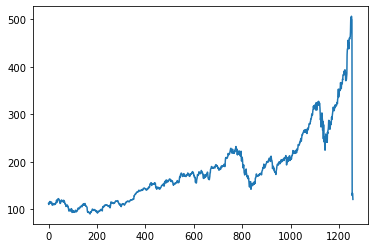

In [10]:
#Now if we want to plot the dataframe df1

import matplotlib.pyplot as plt
plt.plot(df1)

In [11]:
#LSTM are sensitive to the scale of the data. so we apply MinMax scaler to scale the values range between 0 to 1

import numpy as np

In [12]:
df1

0       112.31
1       110.15
2       112.57
3       114.21
4       115.31
         ...  
1253    499.23
1254    129.04
1255    134.18
1256    131.40
1257    120.88
Name: close, Length: 1258, dtype: float64

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [14]:
#Now we can see that our dataframe df1 is converted into array and having values between 0 to 1

df1

array([[0.05284426],
       [0.04764883],
       [0.05346963],
       ...,
       [0.10544799],
       [0.09876127],
       [0.07345761]])

In [15]:
# value from 0 to 1

print(df1)

[[0.05284426]
 [0.04764883]
 [0.05346963]
 ...
 [0.10544799]
 [0.09876127]
 [0.07345761]]


In [16]:
#splitting dataset into train and test split
#splitting dataset plays a mojor role in model prediction
#If it is linear regression and classification ---> cross validation and randon seed works well
#if it is time series data then the previous value(train) have an impact present value(test).
#we have to divide the data in a special way for trainin & testing after doing division of data we can apply data preprocessing
#when ever we have a sequence of data or time series of data the next data is allways dependent on your previous data

training_size=int(len(df1)*0.65)  #the test size is 0.65 --->65%
test_size=len(df1)-training_size  #the test size is 0.35 --->35%
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [17]:
training_size,test_size

(817, 441)

In [18]:
train_data

array([[0.05284426],
       [0.04764883],
       [0.05346963],
       [0.05741431],
       [0.06006013],
       [0.06239327],
       [0.06270595],
       [0.05671678],
       [0.05558629],
       [0.0598196 ],
       [0.05546603],
       [0.05767889],
       [0.05931449],
       [0.05861696],
       [0.05315695],
       [0.04502706],
       [0.04716777],
       [0.04627781],
       [0.04820204],
       [0.04916416],
       [0.05043897],
       [0.04916416],
       [0.04608539],
       [0.05238725],
       [0.0511365 ],
       [0.05159351],
       [0.04779314],
       [0.05176188],
       [0.04978954],
       [0.05144919],
       [0.05635598],
       [0.05633193],
       [0.06051714],
       [0.06912808],
       [0.05998797],
       [0.05823211],
       [0.06958509],
       [0.07261575],
       [0.0701383 ],
       [0.07417919],
       [0.07752255],
       [0.07615153],
       [0.07355382],
       [0.07389056],
       [0.07271197],
       [0.06357186],
       [0.06198437],
       [0.061

In [19]:
test_data

array([[0.20769693],
       [0.20295851],
       [0.18797354],
       [0.19064342],
       [0.18831028],
       [0.18944077],
       [0.19389056],
       [0.18073361],
       [0.17702946],
       [0.18215274],
       [0.16969333],
       [0.15992784],
       [0.14525556],
       [0.13587492],
       [0.16074564],
       [0.15829224],
       [0.15848467],
       [0.16211666],
       [0.16254961],
       [0.12471437],
       [0.13931449],
       [0.13852075],
       [0.14530367],
       [0.15146121],
       [0.15263981],
       [0.14900782],
       [0.1434997 ],
       [0.15088394],
       [0.15538184],
       [0.15759471],
       [0.15990379],
       [0.15143716],
       [0.15292844],
       [0.14999399],
       [0.16216476],
       [0.15865304],
       [0.15475646],
       [0.1801804 ],
       [0.18304269],
       [0.18323512],
       [0.19461215],
       [0.20165965],
       [0.20180397],
       [0.19386651],
       [0.1925917 ],
       [0.19023452],
       [0.19374624],
       [0.192

In [20]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [21]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [22]:
print(X_train.shape),print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [25]:
print(X_test.shape),print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [26]:
#reshape input to be [samples, time steps, features] which is required for LSTM
#reshape our X_train,X_test into 3- dimensional i.e 
#X_train =[samples=716, time steps=100, features=1] for applying LSTM converting into 3-dimensional
#X_test =[samples=340, time steps=100, features=1] for applying LSTM converting into 3-dimensional
#The reason for converting X_train,X_test into 3-dimensional is we are giving these two as input to our LSTM 

X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [27]:
### Create the Stacked LSTM model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [28]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 6s 460ms/step - loss: 0.0069 - val_loss: 0.0464
Epoch 2/100
12/12 [==============================] - 3s 239ms/step - loss: 0.0015 - val_loss: 0.0089
Epoch 3/100
12/12 [==============================] - 3s 232ms/step - loss: 5.0992e-04 - val_loss: 0.0084
Epoch 4/100
12/12 [==============================] - 3s 235ms/step - loss: 3.7834e-04 - val_loss: 0.0082
Epoch 5/100
12/12 [==============================] - 3s 233ms/step - loss: 3.0997e-04 - val_loss: 0.0083
Epoch 6/100
12/12 [==============================] - 3s 236ms/step - loss: 2.9342e-04 - val_loss: 0.0078
Epoch 7/100
12/12 [==============================] - 3s 254ms/step - loss: 3.0593e-04 - val_loss: 0.0081
Epoch 8/100
12/12 [==============================] - 3s 277ms/step - loss: 2.7172e-04 - val_loss: 0.0094
Epoch 9/100
12/12 [==============================] - 3s 242ms/step - loss: 2.8269e-04 - val_loss: 0.0090
Epoch 10/100
12/12 [==============================] - 3s 255ms/

In [31]:
import tensorflow as tf

In [32]:
tf.__version__

'2.2.0'

In [33]:
#Lets Do the prediction and check performance metrics

train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [34]:
#Transformback to original form

train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [35]:
### Calculate RMSE performance metrics

import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

155.04229188298342

In [36]:
### Test Data RMSE

math.sqrt(mean_squared_error(ytest,test_predict))

288.315513699742

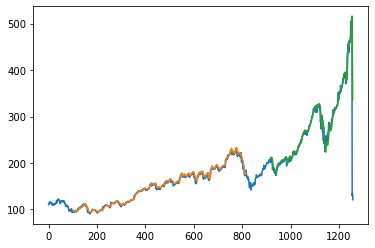

In [37]:
#Plotting

# shift train predictions for plotting

look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [38]:
len(test_data)

441

In [39]:
#Now i am taking previous 100 days data and reshaping it into (1,-1) for my prediction

x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [40]:
#After reshaping my previous 100 days data into (1,-1) we are converting that into list

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [41]:
#The previous 100 days data we convertd into list

temp_input

[0.46684305472038484,
 0.472279013830427,
 0.462922429344558,
 0.44880336740829824,
 0.4282140709561035,
 0.4468069753457607,
 0.44423331328923626,
 0.4633313289236321,
 0.46381238725195434,
 0.4527720986169573,
 0.47478051713770303,
 0.48938063740228505,
 0.4780036079374624,
 0.4878412507516537,
 0.49842453397474445,
 0.5058087793144919,
 0.5132892363199038,
 0.5286590499098016,
 0.5403968731208659,
 0.5317378232110643,
 0.5226939266386048,
 0.5272399278412507,
 0.5228382441371016,
 0.5402766085387853,
 0.5358989777510523,
 0.5505472038484667,
 0.5448226097414313,
 0.5497294046903187,
 0.5445339747444378,
 0.5478532772098617,
 0.5481900180396873,
 0.5474443776307878,
 0.5568490679494889,
 0.5604329524954901,
 0.5647143716175587,
 0.5579795550210462,
 0.5800601322910404,
 0.584774503908599,
 0.6101022248947685,
 0.6313890559230306,
 0.5906434155141311,
 0.5976187612748045,
 0.607696933253157,
 0.6295610342754059,
 0.6283824413710162,
 0.628719182200842,
 0.6238845460012028,
 0.64589296

In [42]:
# demonstrate prediction for next 30 days

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.19237657]
101
1 day input [0.47227901 0.46292243 0.44880337 0.42821407 0.44680698 0.44423331
 0.46333133 0.46381239 0.4527721  0.47478052 0.48938064 0.47800361
 0.48784125 0.49842453 0.50580878 0.51328924 0.52865905 0.54039687
 0.53173782 0.52269393 0.52723993 0.52283824 0.54027661 0.53589898
 0.5505472  0.54482261 0.5497294  0.54453397 0.54785328 0.54819002
 0.54744438 0.55684907 0.56043295 0.56471437 0.55797956 0.58006013
 0.5847745  0.61010222 0.63138906 0.59064342 0.59761876 0.60769693
 0.62956103 0.62838244 0.62871918 0.62388455 0.64589296 0.6643175
 0.64875526 0.66025256 0.63328924 0.65289236 0.66015634 0.65849669
 0.65849669 0.68192423 0.6791341  0.70001203 0.7039567  0.70556825
 0.70131088 0.71651233 0.72293446 0.711365   0.70948888 0.72901984
 0.71595911 0.71858088 0.67598316 0.67377029 0.69488876 0.67990379
 0.69710162 0.70816597 0.80505111 0.83081179 0.83781118 0.8416356
 0.87858088 0.85173782 0.86727601 0.83502105 0.86999399 0.88923632
 0.88825015 0.8853638  0.89455201 0

9 day output [[0.02431281]]
10 day input [0.47478052 0.48938064 0.47800361 0.48784125 0.49842453 0.50580878
 0.51328924 0.52865905 0.54039687 0.53173782 0.52269393 0.52723993
 0.52283824 0.54027661 0.53589898 0.5505472  0.54482261 0.5497294
 0.54453397 0.54785328 0.54819002 0.54744438 0.55684907 0.56043295
 0.56471437 0.55797956 0.58006013 0.5847745  0.61010222 0.63138906
 0.59064342 0.59761876 0.60769693 0.62956103 0.62838244 0.62871918
 0.62388455 0.64589296 0.6643175  0.64875526 0.66025256 0.63328924
 0.65289236 0.66015634 0.65849669 0.65849669 0.68192423 0.6791341
 0.70001203 0.7039567  0.70556825 0.70131088 0.71651233 0.72293446
 0.711365   0.70948888 0.72901984 0.71595911 0.71858088 0.67598316
 0.67377029 0.69488876 0.67990379 0.69710162 0.70816597 0.80505111
 0.83081179 0.83781118 0.8416356  0.87858088 0.85173782 0.86727601
 0.83502105 0.86999399 0.88923632 0.88825015 0.8853638  0.89455201
 0.89594708 0.92064943 0.97929044 0.99360192 0.98366807 1.
 0.98544799 0.9834997  0.093084

18 day output [[-0.13200891]]
19 day input [ 0.53173782  0.52269393  0.52723993  0.52283824  0.54027661  0.53589898
  0.5505472   0.54482261  0.5497294   0.54453397  0.54785328  0.54819002
  0.54744438  0.55684907  0.56043295  0.56471437  0.55797956  0.58006013
  0.5847745   0.61010222  0.63138906  0.59064342  0.59761876  0.60769693
  0.62956103  0.62838244  0.62871918  0.62388455  0.64589296  0.6643175
  0.64875526  0.66025256  0.63328924  0.65289236  0.66015634  0.65849669
  0.65849669  0.68192423  0.6791341   0.70001203  0.7039567   0.70556825
  0.70131088  0.71651233  0.72293446  0.711365    0.70948888  0.72901984
  0.71595911  0.71858088  0.67598316  0.67377029  0.69488876  0.67990379
  0.69710162  0.70816597  0.80505111  0.83081179  0.83781118  0.8416356
  0.87858088  0.85173782  0.86727601  0.83502105  0.86999399  0.88923632
  0.88825015  0.8853638   0.89455201  0.89594708  0.92064943  0.97929044
  0.99360192  0.98366807  1.          0.98544799  0.9834997   0.09308479
  0.105447

27 day output [[-0.17096181]]
28 day input [ 0.54453397  0.54785328  0.54819002  0.54744438  0.55684907  0.56043295
  0.56471437  0.55797956  0.58006013  0.5847745   0.61010222  0.63138906
  0.59064342  0.59761876  0.60769693  0.62956103  0.62838244  0.62871918
  0.62388455  0.64589296  0.6643175   0.64875526  0.66025256  0.63328924
  0.65289236  0.66015634  0.65849669  0.65849669  0.68192423  0.6791341
  0.70001203  0.7039567   0.70556825  0.70131088  0.71651233  0.72293446
  0.711365    0.70948888  0.72901984  0.71595911  0.71858088  0.67598316
  0.67377029  0.69488876  0.67990379  0.69710162  0.70816597  0.80505111
  0.83081179  0.83781118  0.8416356   0.87858088  0.85173782  0.86727601
  0.83502105  0.86999399  0.88923632  0.88825015  0.8853638   0.89455201
  0.89594708  0.92064943  0.97929044  0.99360192  0.98366807  1.
  0.98544799  0.9834997   0.09308479  0.10544799  0.09876127  0.07345761
  0.19237657  0.09779446  0.05355256  0.03708914  0.0338379   0.03541929
  0.03720457  0.0

In [43]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [44]:
import matplotlib.pyplot as plt

In [45]:
len(df1)

1258

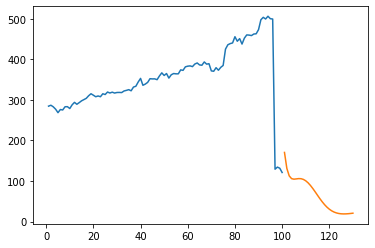

In [46]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

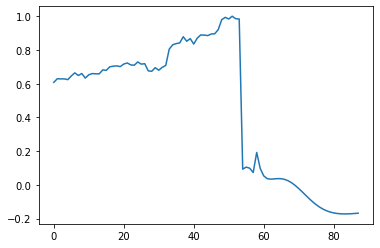

In [47]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

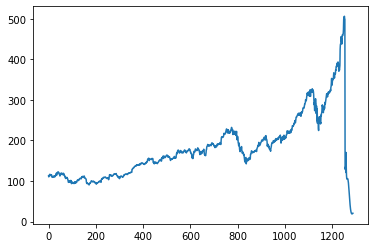

In [48]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)